### 1. Introduction

**Contexte et objectif** :

La satisfaction des passagers est un élément vital pour le succès et la réputation de toute compagnie aérienne. Récemment, les résultats de l'enquête auprès des passagers de Maven Airlines ont révélé un taux de satisfaction inférieur à 50 % pour la première fois. L'objectif de cette analyse est d'identifier les domaines clés qui nécessitent une amélioration et de recommander une stratégie basée sur les données pour augmenter le taux de satisfaction.

**Import du dataset et outils analytiques** :

Pour cette analyse, nous utiliserons la bibliothèque Pandas de Python afin d'importer le dataset et effectuer les manipulations nécessaires. Les bibliothèques Numpy, Seaborn, et Matplotlib seront employées pour transformer les données et réaliser des visualisations pertinentes. En outre, Scikit-Learn sera utilisé pour appliquer des techniques de Machine Learning afin de déceler des tendances complexes et des relations au sein des données. Enfin, Plotly sera mis en œuvre pour créer un tableau de bord interactif, permettant une exploration visuelle détaillée et intuitive des données.

**Description du dataset** :

Le jeu de données comprend un nombre significatif d'observations et de variables liées à la satisfaction des passagers de Maven Airlines. Il couvre divers aspects de l'expérience de vol, tels que le confort des sièges, la qualité des repas, la ponctualité des vols, les services annexes et bien d'autres. Les informations contenues dans ce dataset permettront de comprendre les facteurs spécifiques qui influencent la satisfaction des passagers et d'élaborer des recommandations concrètes pour améliorer l'expérience client.

### 2. Import des Données et Librairies

In [29]:
# Chargement des differentes bibliotheques necessaire à notre etude

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px
import dash
from dash import dcc
from dash import html



pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [30]:
# Import du dataset
df = pd.read_csv("/Users/arvind.b/Downloads/Airline+Passenger+Satisfaction (1)/airline_passenger_satisfaction.csv")

# Visualisation des premieres lignes de notre dataset
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [31]:
df.describe(include = "all")

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
count,129880.000000,129880,129880.000000,129880,129880,129880,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880
unique,NaN,2,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Female,NaN,Returning,Business,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral or Dissatisfied
freq,NaN,65899,NaN,106100,89693,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73452
mean,64940.500000,NaN,39.427957,NaN,NaN,NaN,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,NaN
std,37493.270818,NaN,15.119360,NaN,NaN,NaN,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,NaN
min,1.000000,NaN,7.000000,NaN,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,32470.750000,NaN,27.000000,NaN,NaN,NaN,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,NaN
50%,64940.500000,NaN,40.000000,NaN,NaN,NaN,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,NaN
75%,97410.250000,NaN,51.000000,NaN,NaN,NaN,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,NaN


### 3. Nettoyage et Préparation des Données

Dans cette section, nous allons effectuer une étude préliminaire des données en se concentrant sur les aspects suivants :

**Identification et traitement des valeurs manquantes** : Nous examinerons les données pour identifier les valeurs manquantes et déterminer la meilleure méthode pour les gérer, que ce soit par suppression ou imputation.

**Vérification des valeurs doublons** : Une analyse sera effectuée pour détecter les éventuelles duplications dans le dataset. Les doublons seront évalués et traités selon la pertinence pour l'analyse.

**Vérification du type de chaque variable** : Nous allons vérifier le type de chaque variable dans notre ensemble de données afin d'assurer que chaque attribut est du type approprié. Une conversion de types sera effectuée si nécessaire.



In [32]:
# Identification des valeurs manquantes

valeurs_manquantes = df.isnull().sum()
print("Valeurs manquantes par variable :")
print(valeurs_manquantes)



Valeurs manquantes par variable :
ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0


In [33]:
# Traitement des valeurs manquantes

for colonne in df.columns:

    # Si la colonne est de type numérique, remplir les valeurs manquantes avec la mediane

    if df[colonne].dtype == 'float64' or df[colonne].dtype == 'int64':
        df[colonne].fillna(df[colonne].median(), inplace=True)

    # Si la colonne est de type catégoriel (objet), remplir les valeurs manquantes avec la valeur la plus fréquente
    
    elif df[colonne].dtype == 'object':
        mode_colonne = df[colonne].mode().iloc[0]
        df[colonne].fillna(mode_colonne, inplace=True)


print("Nombre de valeurs manquantes restantes :", df.isnull().sum())



Nombre de valeurs manquantes restantes : ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment            

In [34]:
# Identification les doublons
doublons = df.duplicated()
print("Nombre de doublons trouvés :", doublons.sum())

# Traitement des doublons, dans notre cas nous avons choisi de les supprimer
donnees = df.drop_duplicates()
print("Doublons supprimés.")


Nombre de doublons trouvés : 0
Doublons supprimés.


In [35]:
# Afficher les types de chaque variable
types_variables = df.dtypes
print("Types de variables :")
print(types_variables)



Types de variables :
ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service            

In [36]:
# Conversion de types des variables

df['ID'] = df['ID'].astype(object)
df['Arrival Delay'] = df['Arrival Delay'].astype(int)
print(df.dtypes)

ID                                        object
Gender                                    object
Age                                        int64
Customer Type                             object
Type of Travel                            object
Class                                     object
Flight Distance                            int64
Departure Delay                            int64
Arrival Delay                              int64
Departure and Arrival Time Convenience     int64
Ease of Online Booking                     int64
Check-in Service                           int64
Online Boarding                            int64
Gate Location                              int64
On-board Service                           int64
Seat Comfort                               int64
Leg Room Service                           int64
Cleanliness                                int64
Food and Drink                             int64
In-flight Service                          int64
In-flight Wifi Servi

Maintenant que nous avons fait tout les traitements necessaire au nettoyage de nos données, nous pouvons commencé l'analyse exploratoire. Pour cela, nous allons commencé par une analyse univariée, bivariée et multivariée.
Nous enchainerons avec un modele de Machine Learning et voir si nous pouvons predire la note de sastisfaction de nos clients.

### 4. Analyse Univariée

Quelle est la distribution globale de la satisfaction des passagers dans le jeu de données?

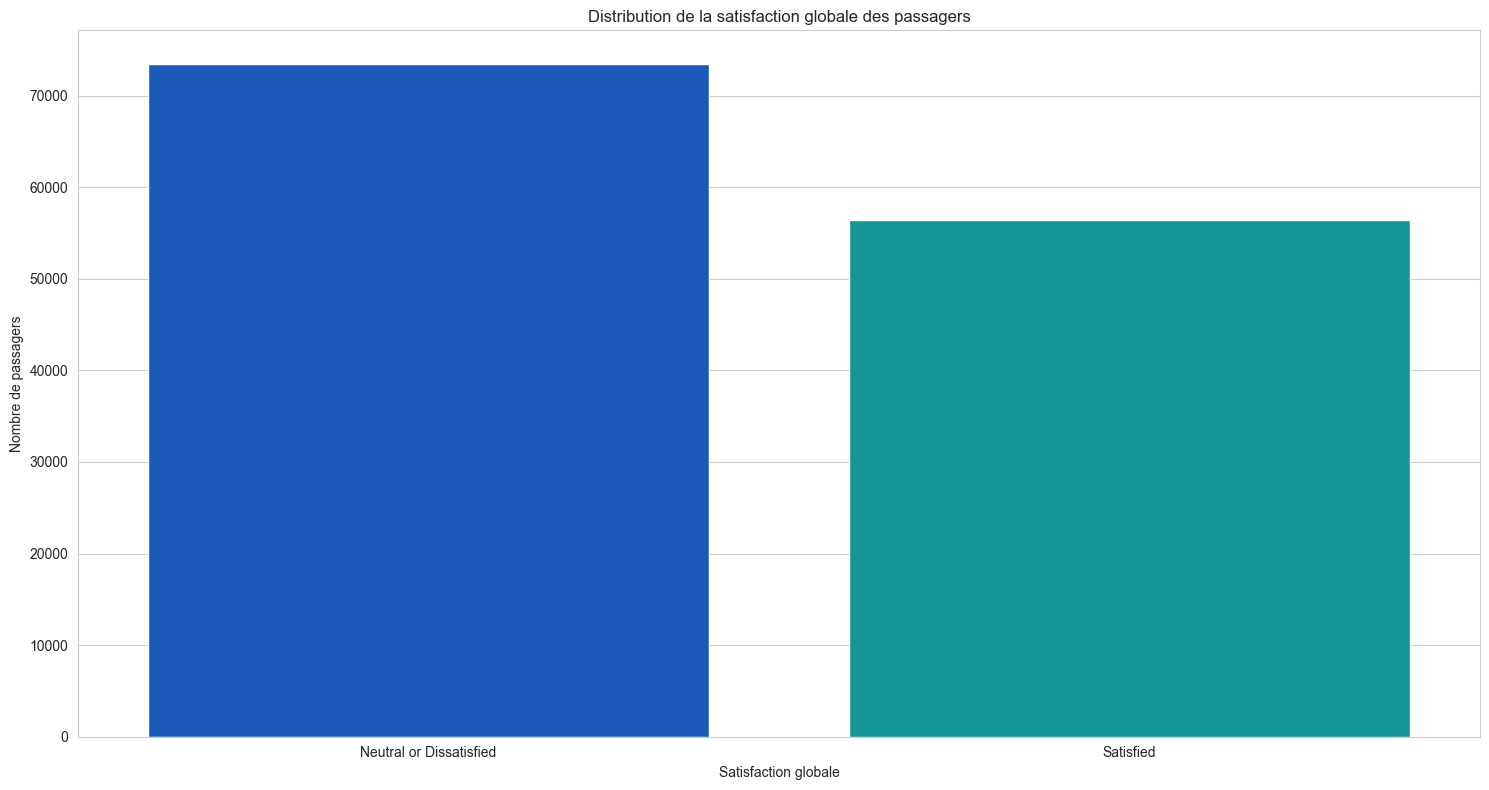

In [37]:
# Tracer la distribution de la satisfaction globale des passagers

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Satisfaction', data = df, palette = 'winter')
plt.title('Distribution de la satisfaction globale des passagers')
plt.xlabel('Satisfaction globale')
plt.ylabel('Nombre de passagers')
plt.tight_layout()
plt.show()


Observation : Le graphique montre la distribution de la satisfaction globale des passagers. Nous pouvons observer que le nombre de passagers qui sont neutres ou insatifaits est bien supérieur au nombre de passagers satisfaits.

Quelle est la distribution de l'âge des passagers dans le jeu de données?

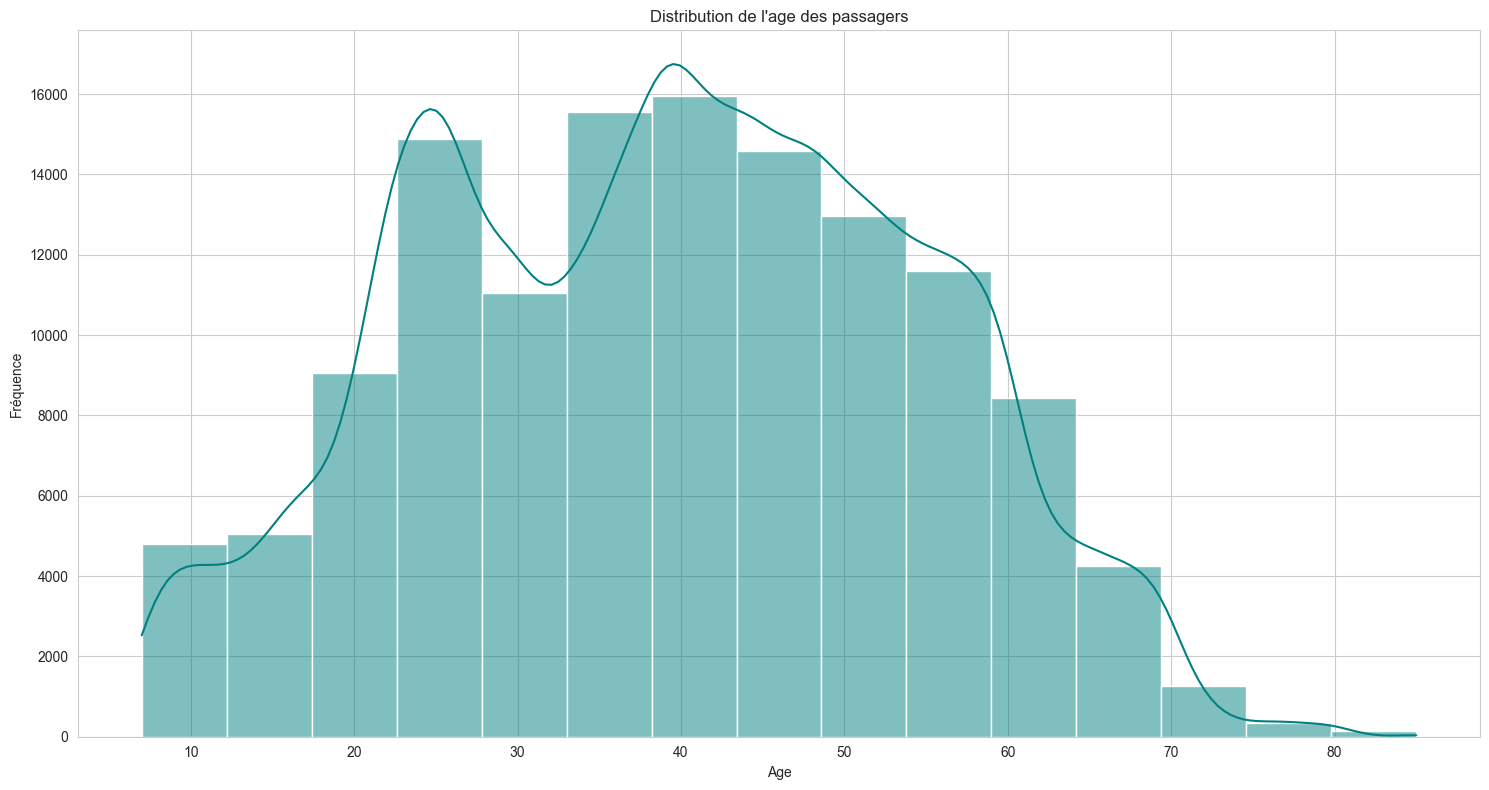

In [38]:
# Tracer la distribution d'age des passagers

plt.figure(figsize = (15, 8))
sns.histplot(df['Age'], bins = 15, kde = True, color = 'teal')
plt.title('Distribution de l\'age des passagers')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()


Observation : L'histogramme montre la distribution de l'âge des passagers. Nous pouvons observer une distribution relativement uniforme avec quelques pics notables, notamment dans les tranches d'âge de 20 à 30 ans et de 35 à 45 ans.

Quelle est la distribution du type de voyage (business ou personnel) parmi les passagers ?

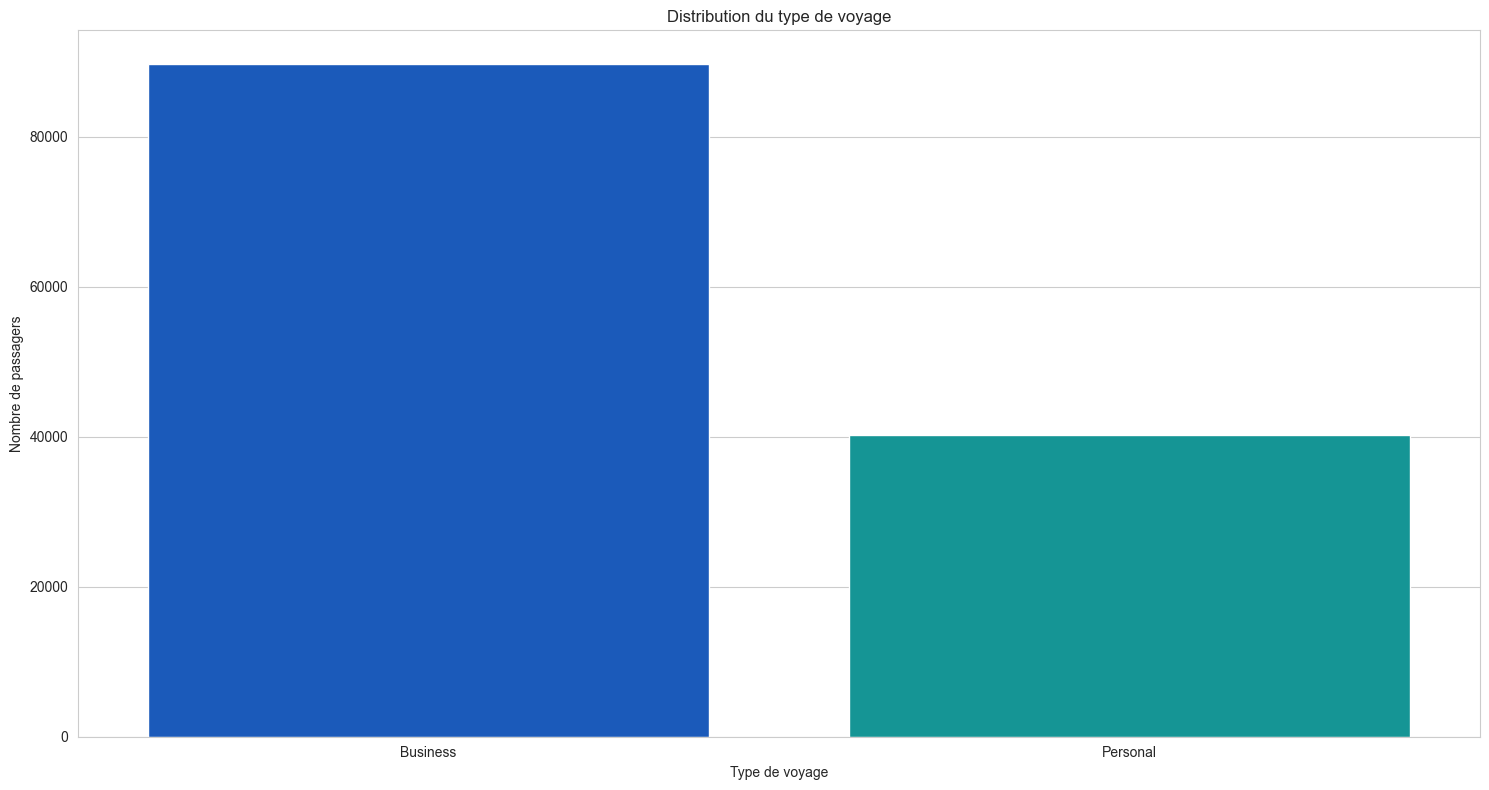

In [39]:
# Tracer la distribution du type de voyage (Travail/Personnel)

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Type of Travel', data = df, palette = 'winter')
plt.title('Distribution du type de voyage')
plt.xlabel('Type de voyage')
plt.ylabel('Nombre de passagers')
plt.tight_layout()
plt.show()


Observation : Le diagramme à barres montre clairement que la majorité des passagers dans ce jeu de données voyagent pour des raisons professionnelles (Business), tandis qu'une proportion plus faible voyage pour des raisons personnelles.

Quelle est la distribution de la classe de voyage parmi les passagers ?

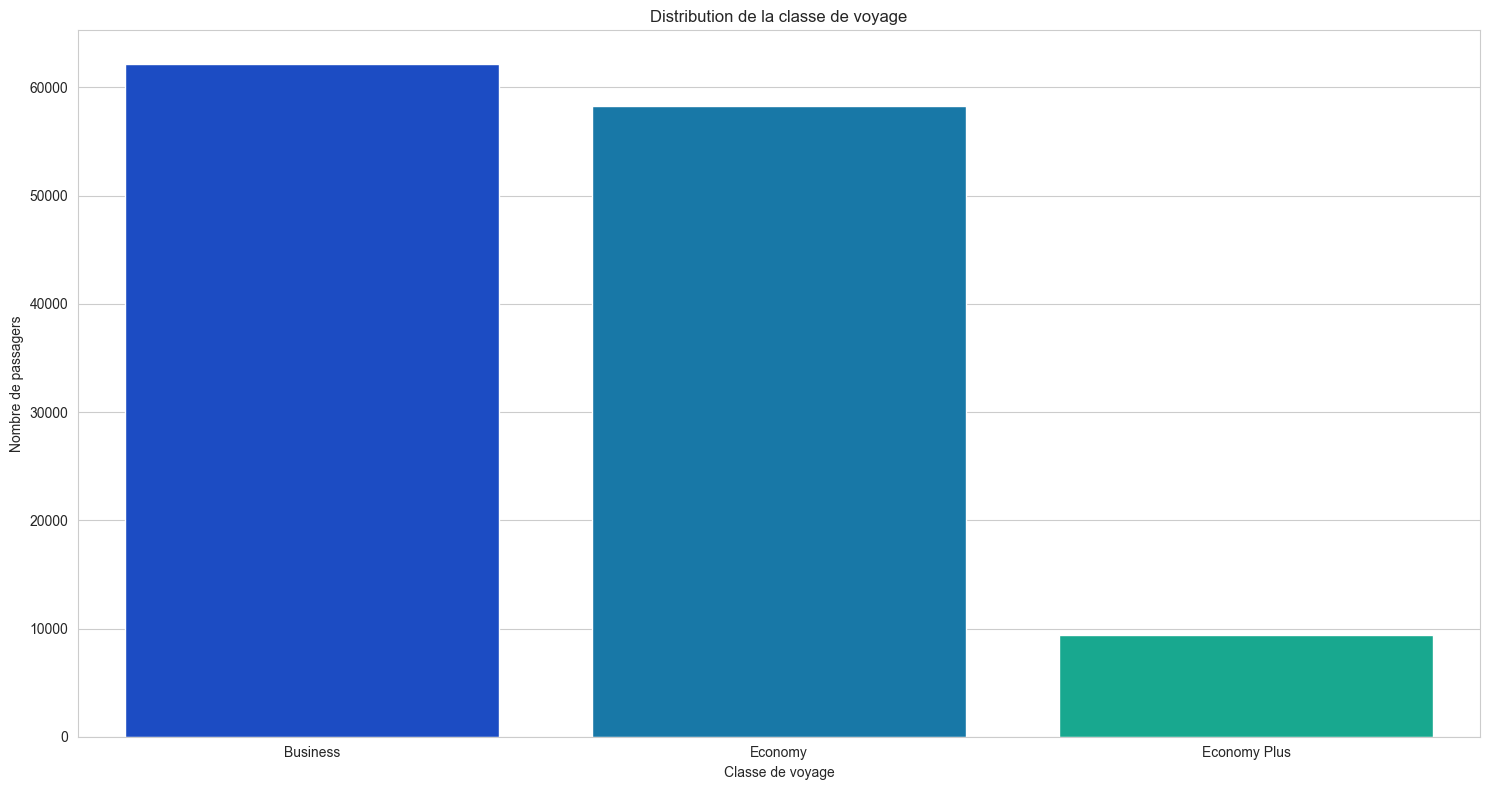

In [40]:
# tracer la distribution de la classe de voyage des passagers

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Class', data = df, palette = 'winter')
plt.title('Distribution de la classe de voyage')
plt.xlabel('Classe de voyage')
plt.ylabel('Nombre de passagers')
plt.tight_layout()
plt.show()


Observation : Le diagramme à barres montre la distribution de la classe de voyage parmi les passagers. La majorité des passagers voyagent en classe affaires (Business), suivie par la classe économique (Eco), et enfin la classe économique plus (Eco Plus).

Quelle est la distribution de la satisfaction à l'égard du service Wi-Fi à bord parmi les passagers ?

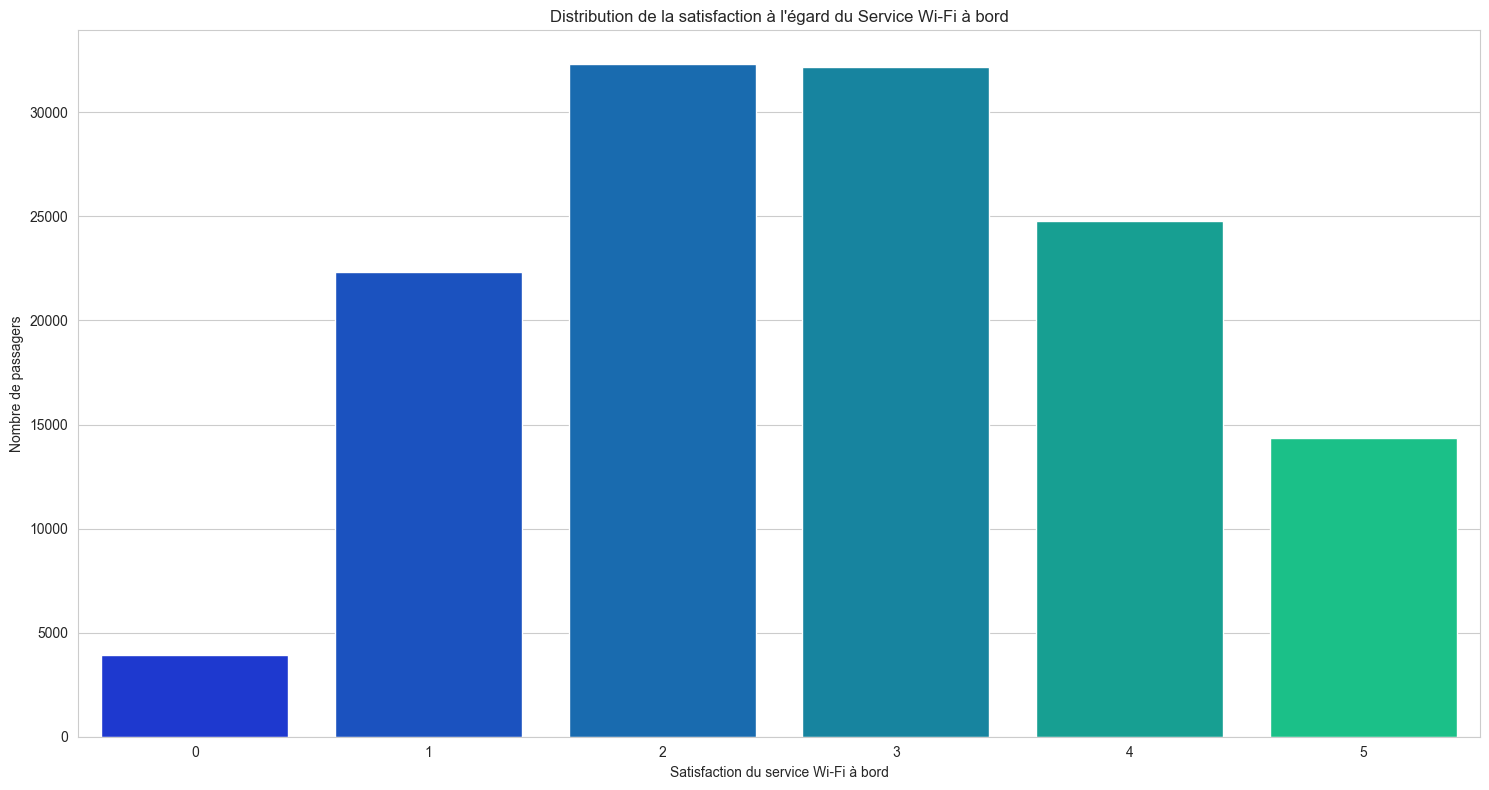

In [41]:
# Tracer la distribution des notes du service Wifi par les passagers

plt.figure(figsize = (15, 8))
sns.countplot(x = 'In-flight Wifi Service', data = df, palette = 'winter')
plt.title('Distribution de la satisfaction à l\'égard du Service Wi-Fi à bord')
plt.xlabel('Satisfaction du service Wi-Fi à bord')
plt.ylabel('Nombre de passagers')
plt.tight_layout()
plt.show()


Observation : Le diagramme à barres montre la distribution de la satisfaction à l'égard du service Wi-Fi à bord, évaluée sur une échelle de 1 à 5. Il semble y avoir une distribution variée avec un pic notable pour la note 2 et 3, indiquant une insatisfaction relative.

### 5. Analyse Bivariée


Comment la satisfaction globale des passagers varie-t-elle en fonction de la classe de voyage ?

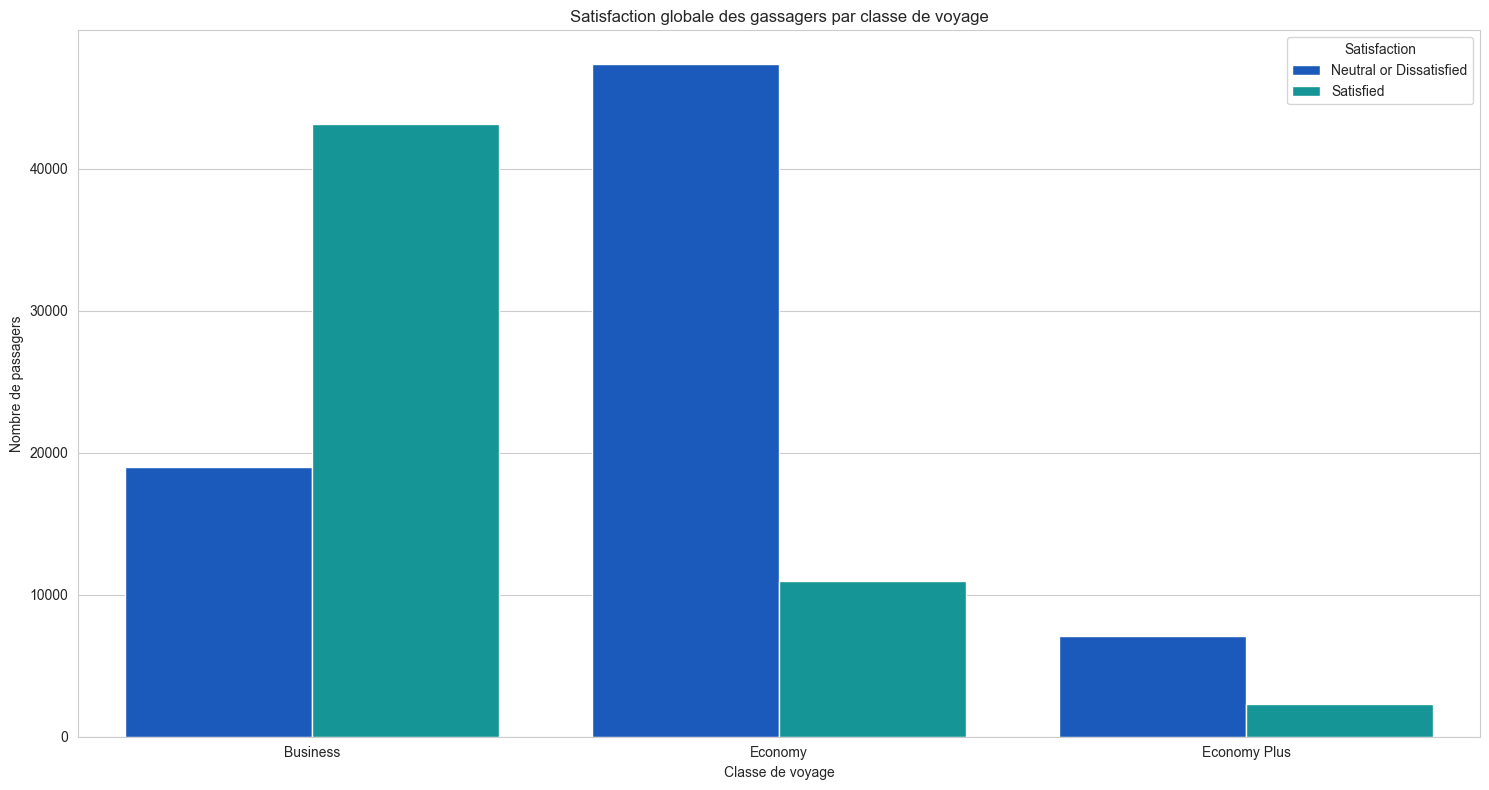

In [42]:
# Tracer la relation entre la satisfaction globale et la classe de voyage

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Class', hue = 'Satisfaction', data = df, palette = 'winter')
plt.title('Satisfaction globale des gassagers par classe de voyage')
plt.xlabel('Classe de voyage')
plt.ylabel('Nombre de passagers')
plt.legend(title = 'Satisfaction')
plt.tight_layout()
plt.show()


Observation : Le diagramme à barres montre la répartition de la satisfaction globale des passagers par classe de voyage. Nous pouvons observer que :

En classe affaires (Business), la majorité des passagers sont satisfaits.
En classe économique (Eco) et économique plus (Eco Plus), la majorité des passagers est insatisfaite.

Comment la satisfaction globale des passagers varie-t-elle en fonction de l'âge ?

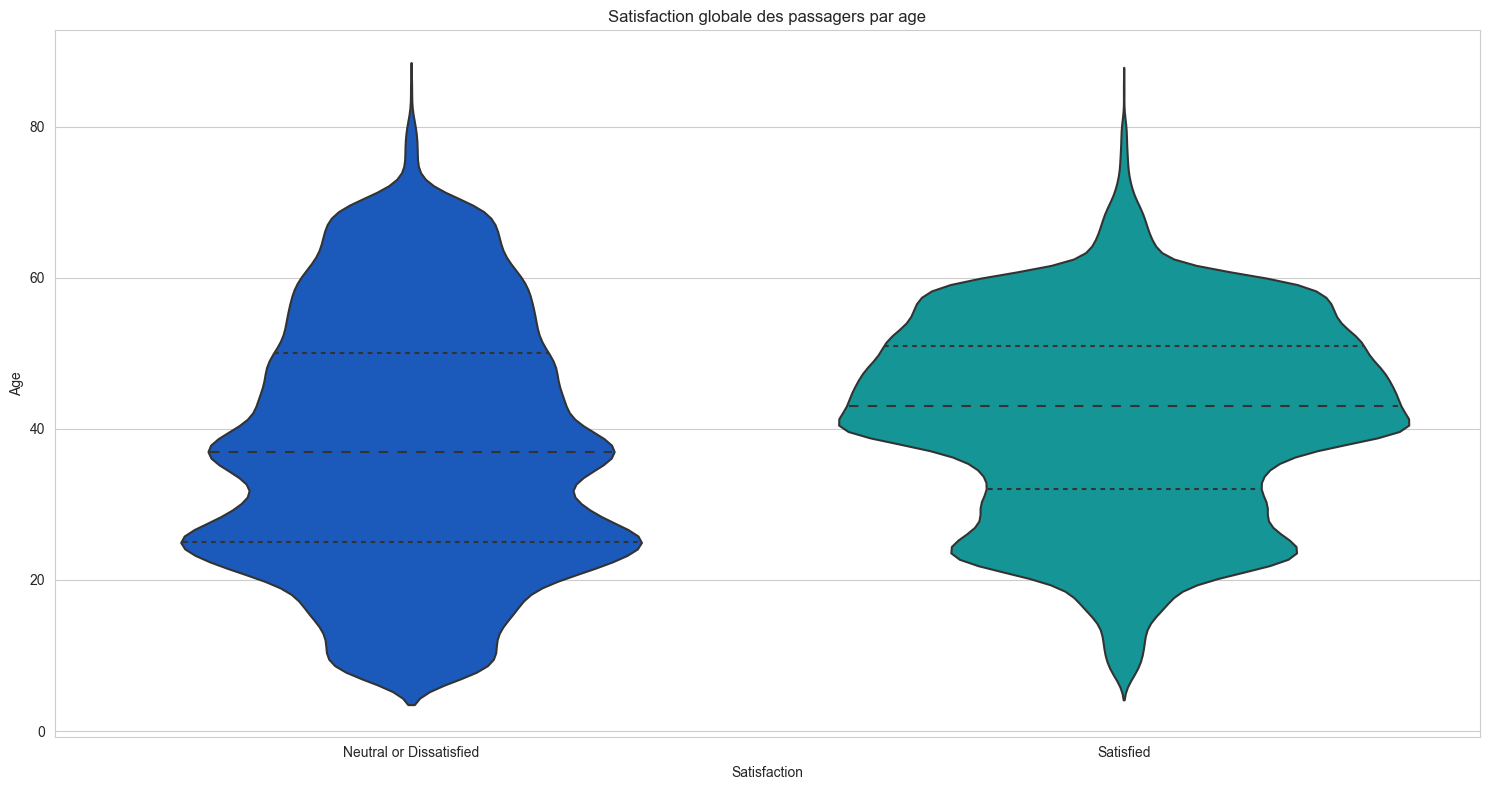

In [43]:
# Tracer la relation entre la satisfaction globale et l'age des passagers

plt.figure(figsize = (15, 8))
sns.violinplot(x = 'Satisfaction', y = 'Age', data = df, palette = 'winter', inner = 'quartile')
plt.title('Satisfaction globale des passagers par age')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


Observation : Le diagramme en violon montre la distribution de l'âge des passagers en fonction de leur satisfaction globale. Nous pouvons observer que :

Les passagers satisfaits ont une distribution d'âge plus étroite, avec une concentration autour de la quarantaine.
Les passagers insatisfaits ou neutres ont une distribution d'âge large, mais avec une concentration légèrement plus jeune, autour de la vingtaine.

Comment la satisfaction des passagers varie-t-elle en fonction de la satisfaction du service Wi-Fi à bord ?

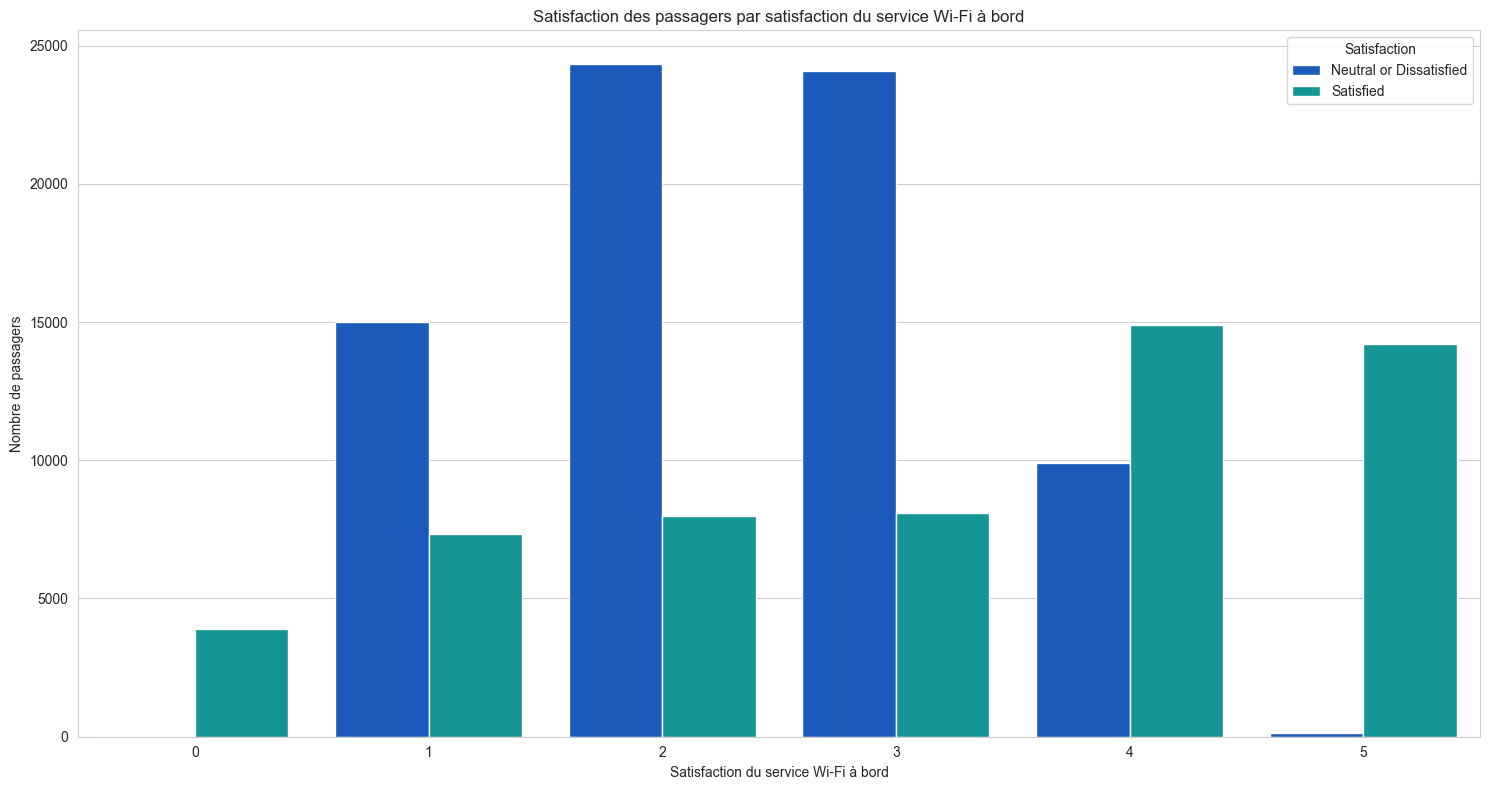

In [44]:
# Tracer la relation entre satisfaction globale des passagers et service Wifi en vol
plt.figure(figsize = (15, 8))
sns.countplot(x = 'In-flight Wifi Service', hue = 'Satisfaction', data = df, palette = 'winter')
plt.title('Satisfaction des passagers par satisfaction du service Wi-Fi à bord')
plt.xlabel('Satisfaction du service Wi-Fi à bord')
plt.ylabel('Nombre de passagers')
plt.legend(title = 'Satisfaction')
plt.tight_layout()
plt.show()


Observation : Le diagramme à barres montre la relation entre la satisfaction des passagers et la satisfaction du service Wi-Fi à bord. Nous pouvons observer que :

Les passagers qui ont évalué le service Wi-Fi à 4 ou 5 sont majoritairement satisfaits.
Les passagers qui ont évalué le service Wi-Fi à 1 ou 2 voire 3 sont majoritairement insatisfaits.

Comment la satisfaction des passagers varie-t-elle en fonction du type de voyage (business ou personnel) ?

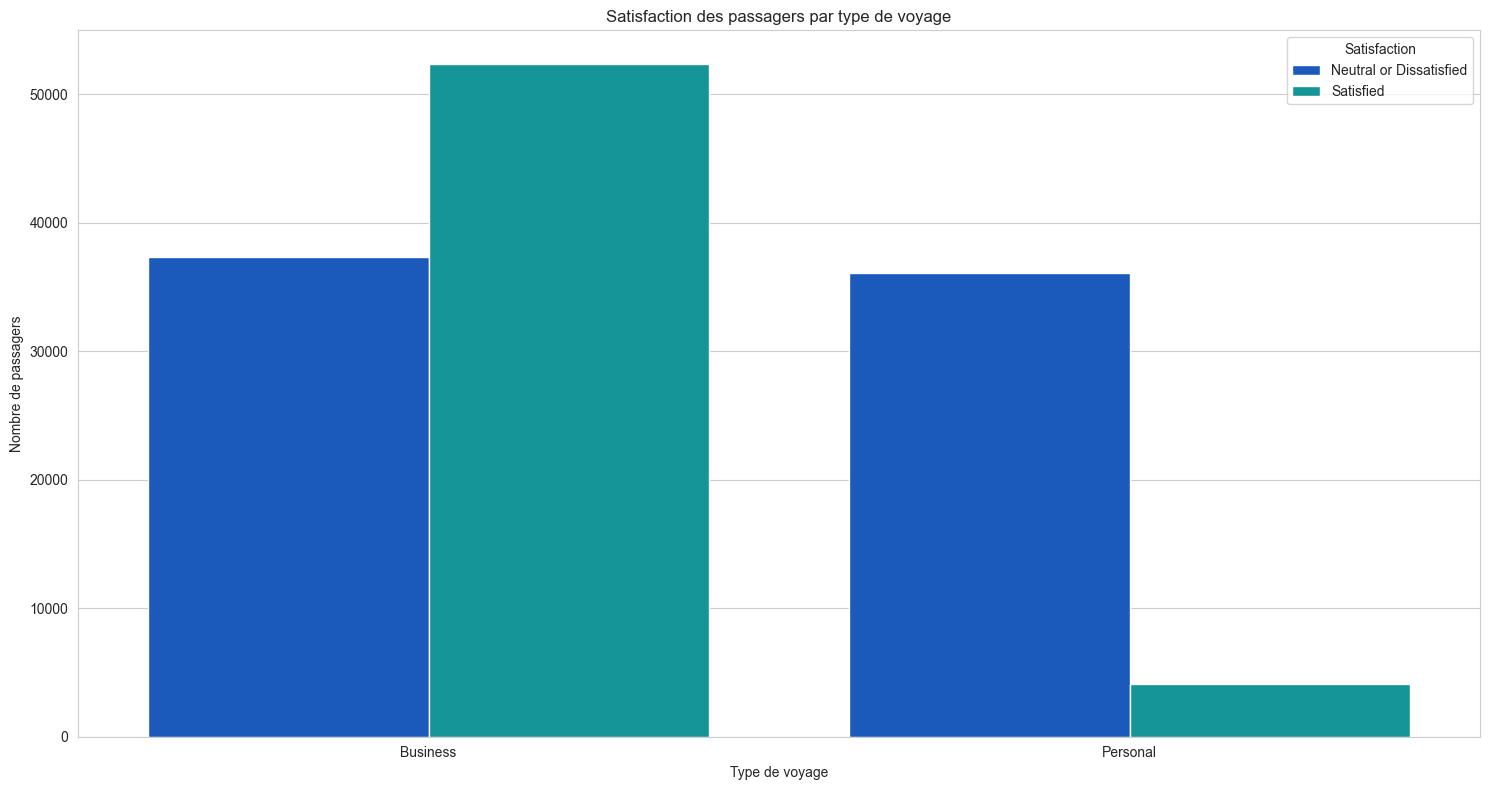

In [45]:
# Tracer la relation entre la satisfaction globale et le type de voyage
plt.figure(figsize = (15, 8))
sns.countplot(x = 'Type of Travel', hue = 'Satisfaction', data = df, palette = 'winter')
plt.title('Satisfaction des passagers par type de voyage')
plt.xlabel('Type de voyage')
plt.ylabel('Nombre de passagers')
plt.legend(title = 'Satisfaction')
plt.tight_layout()
plt.show()


Observation : Le diagramme à barres montre la répartition de la satisfaction des passagers en fonction du type de voyage. Nous pouvons observer que :

Parmi les voyageurs d'affaires, la satisfaction est plutot equilibré avec une majorité de satisfait.
Parmi les voyageurs personnels, la majorité est insatisfaite ou neutres.

Comment la satisfaction des passagers varie-t-elle en fonction de la satisfaction du service de restauration à bord ?

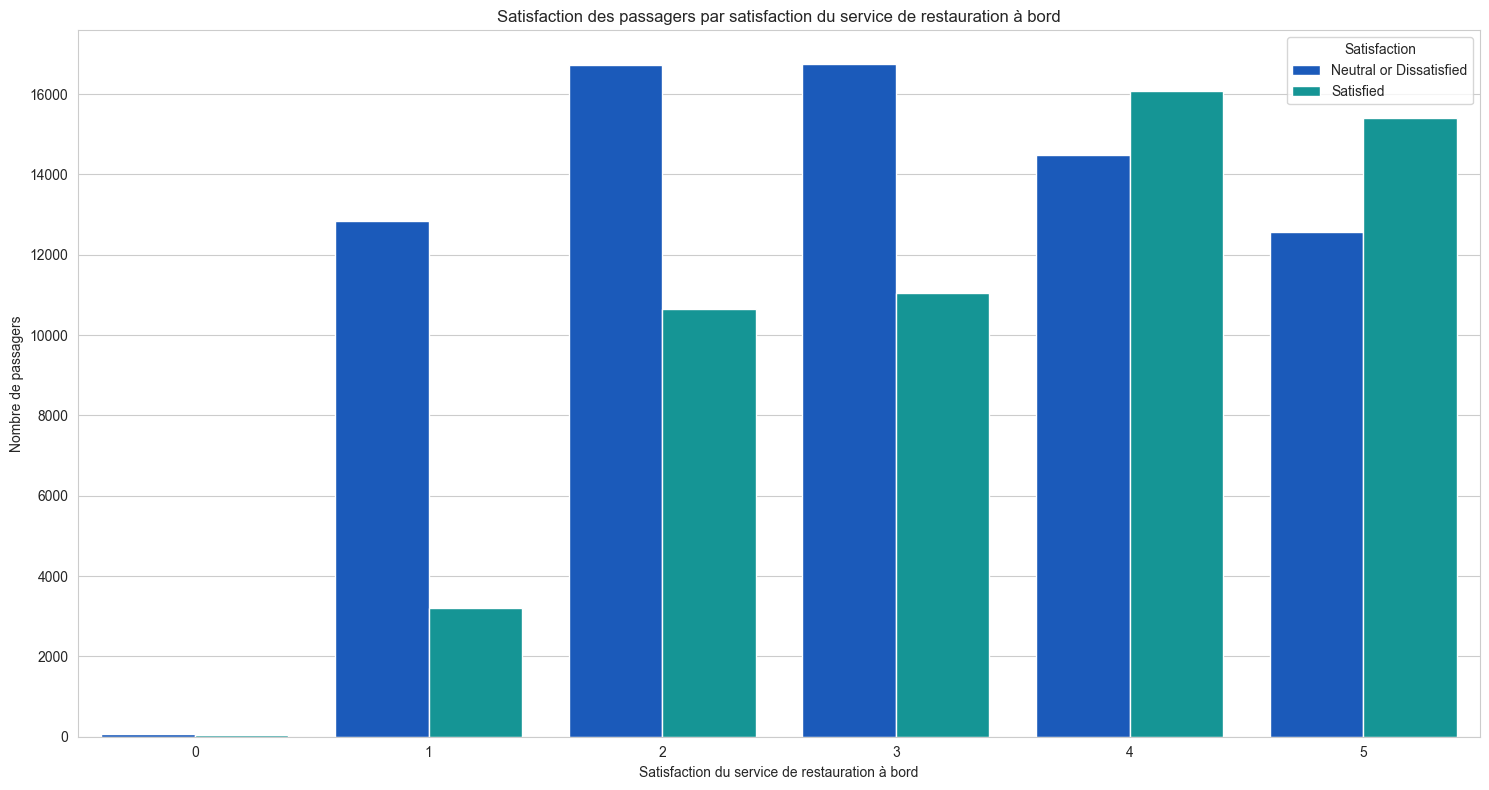

In [46]:
# Tracer la relation entre la satisfaction globale et la satisfaction au service Restauration à bord

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Food and Drink', hue = 'Satisfaction', data = df, palette = 'winter')
plt.title('Satisfaction des passagers par satisfaction du service de restauration à bord')
plt.xlabel('Satisfaction du service de restauration à bord')
plt.ylabel('Nombre de passagers')
plt.legend(title = 'Satisfaction')
plt.tight_layout()
plt.show()


Observation : Le diagramme à barres montre la répartition de la satisfaction des passagers en fonction de la satisfaction du service de restauration à bord. Nous pouvons observer que :

Les passagers qui ont évalué le service de restauration à 4 ou 5 sont majoritairement satisfaits.
Les passagers qui ont évalué le service de restauration à 1 ou 2 voire 3 sont majoritairement insatisfaits ou neutres.

### 6. Analyse Multivariée

Comment la satisfaction des passagers varie-t-elle en fonction de la classe de voyage et de l'âge ?

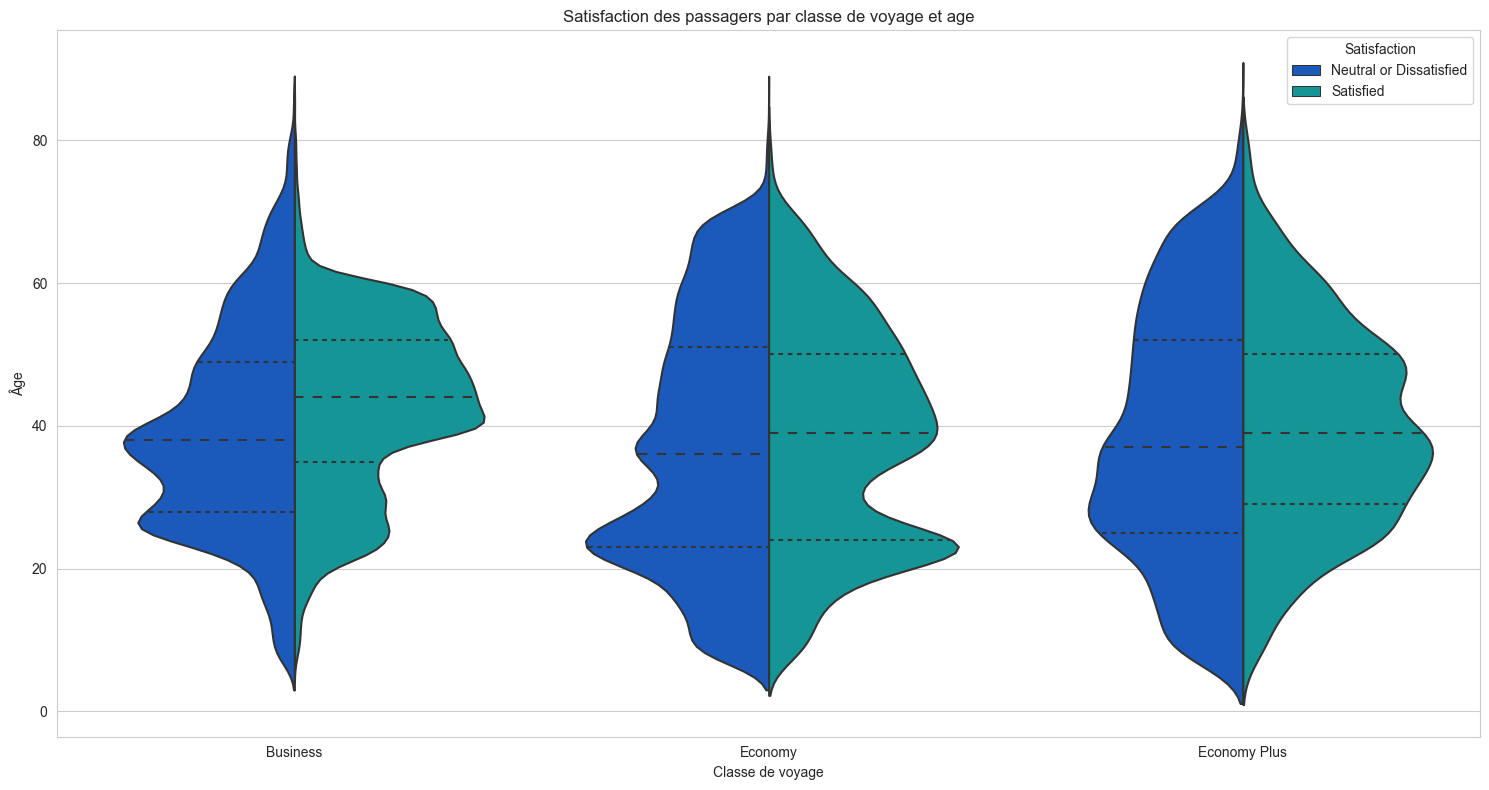

In [47]:
# Tracer la relation entre classe de voyage, satisfaction globale et age des voyageurs

plt.figure(figsize = (15, 8))
sns.violinplot(x = 'Class', y = 'Age', hue = 'Satisfaction', data = df, palette = 'winter', inner = 'quartile', split = True)
plt.title('Satisfaction des passagers par classe de voyage et age')
plt.xlabel('Classe de voyage')
plt.ylabel('Âge')
plt.legend(title = 'Satisfaction')
plt.tight_layout()
plt.show()


Observation : Le diagramme montre la répartition de l'âge des passagers en fonction de la classe de voyage et de la satisfaction globale. Nous pouvons observer que :

En classe affaires, la distribution de l'âge des passagers satisfaits est au dessus de la quarantaine, alors qu'elle est inferieure a 40 ans pour les insatisfaits.
En classe économique et économique plus, la distribution de l'âge est plutot basse que ce soit pour les personnes satisfaites et insatisfaites.

Comment la satisfaction des passagers varie-t-elle en fonction du type de voyage et de la satisfaction du service de restauration à bord ?

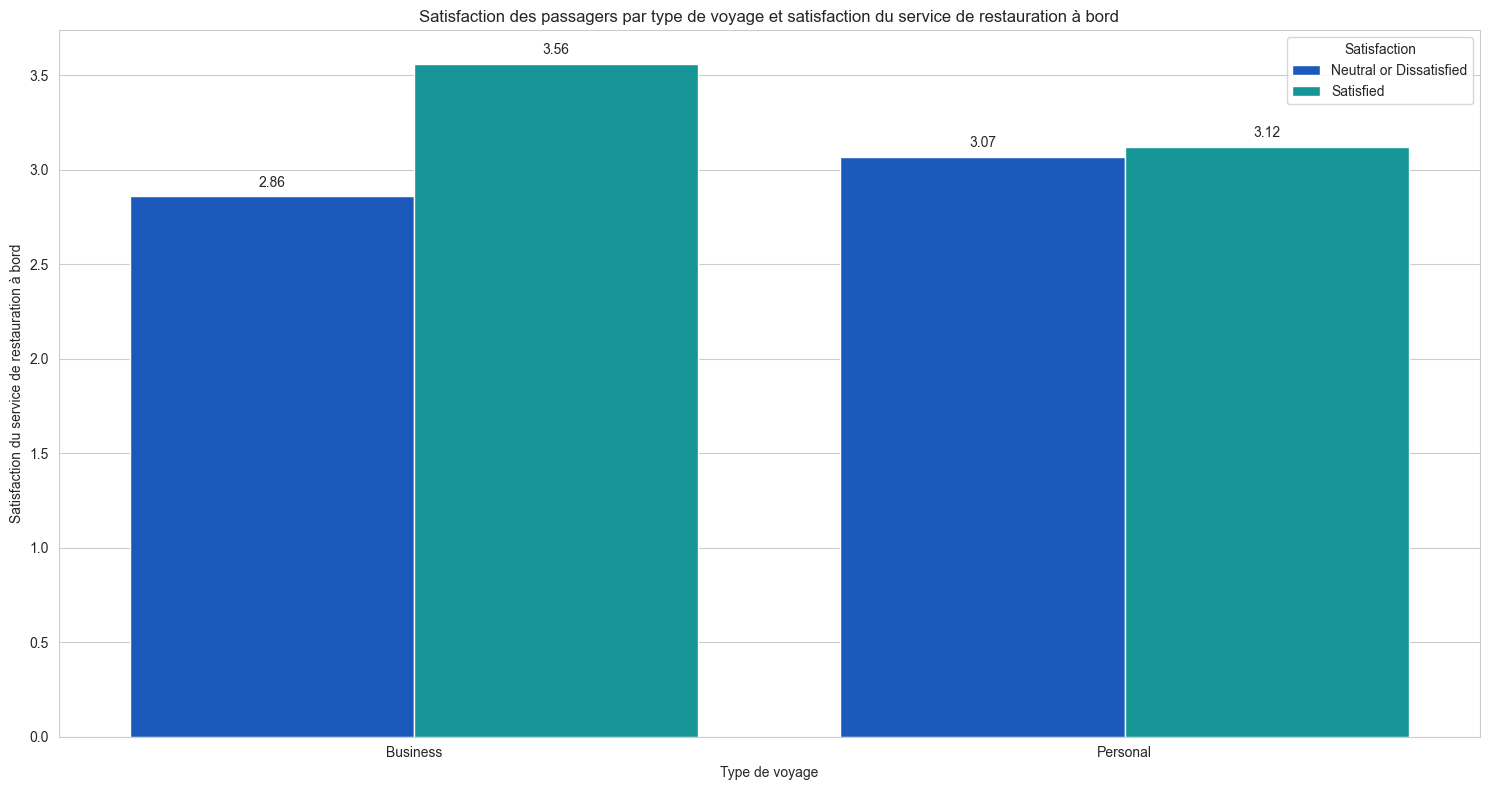

In [48]:
# Tracer la relation entre la satisfaction globale des voyageurs, le type de voyage et la note du service restauration à bord

df_fooddrink = df[df['Food and Drink'] != 0]

plt.figure(figsize = (15, 8))
barplot1 = sns.barplot(x = 'Type of Travel', y = 'Food and Drink', hue = 'Satisfaction', data = df_fooddrink, palette = 'winter', errorbar = None)
plt.title('Satisfaction des passagers par type de voyage et satisfaction du service de restauration à bord')
plt.xlabel('Type de voyage')
plt.ylabel('Satisfaction du service de restauration à bord')
plt.legend(title = 'Satisfaction')
plt.tight_layout()

for p in barplot1.patches:
    barplot1.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')

plt.show()

Observation : Le diagramme à barres montre la relation entre la satisfaction des passagers, le type de voyage (business ou personnel) et la satisfaction du service de restauration à bord. Nous pouvons observer que :

Les voyageurs d'affaires satisfaits ont tendance à évaluer plus positivement le service de restauration à bord.
Les voyageurs personnels satisfaits et insatisfaits ou neutres ont tendance à évaluer de la meme maniere le service de restauration à bord.

Comment la satisfaction des passagers varie-t-elle en fonction de la classe de voyage et de la satisfaction du service Wi-Fi à bord ?

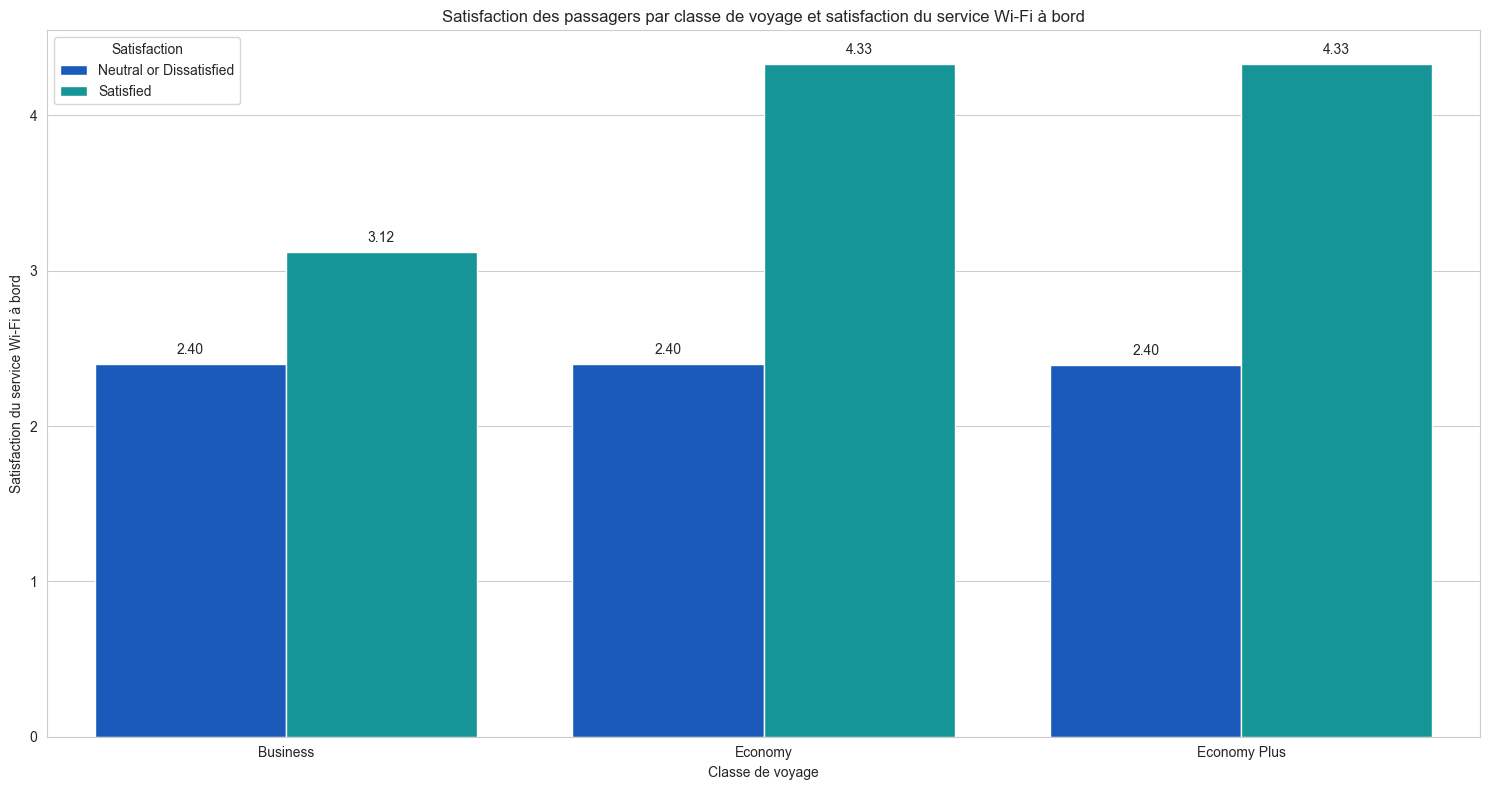

In [49]:
# Tracer la relation entre la satisfaction globale, la classe de voyage et le service Wifi à bord

df_wifi = df[df['In-flight Wifi Service'] != 0]

plt.figure(figsize = (15, 8))
barplot2 = sns.barplot(x = 'Class', y = 'In-flight Wifi Service', hue = 'Satisfaction', data = df_wifi, palette = 'winter', errorbar = None)
plt.title('Satisfaction des passagers par classe de voyage et satisfaction du service Wi-Fi à bord')
plt.xlabel('Classe de voyage')
plt.ylabel('Satisfaction du service Wi-Fi à bord')
plt.legend(title = 'Satisfaction')
plt.tight_layout()

for p in barplot2.patches:
    barplot2.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')

plt.show()

Observation : Le diagramme à barres montre la relation entre la satisfaction des passagers, la classe de voyage et la satisfaction du service Wi-Fi à bord. Nous pouvons observer que :

De maniere generale, peu importe la classe de voyage, les voyageurs qui ont tendance a etre satisfait du service Wifi, le sont aussi au globale.

Comment la satisfaction des passagers varie-t-elle en fonction de la classe de voyage et de la satisfaction des siéges à bord ?

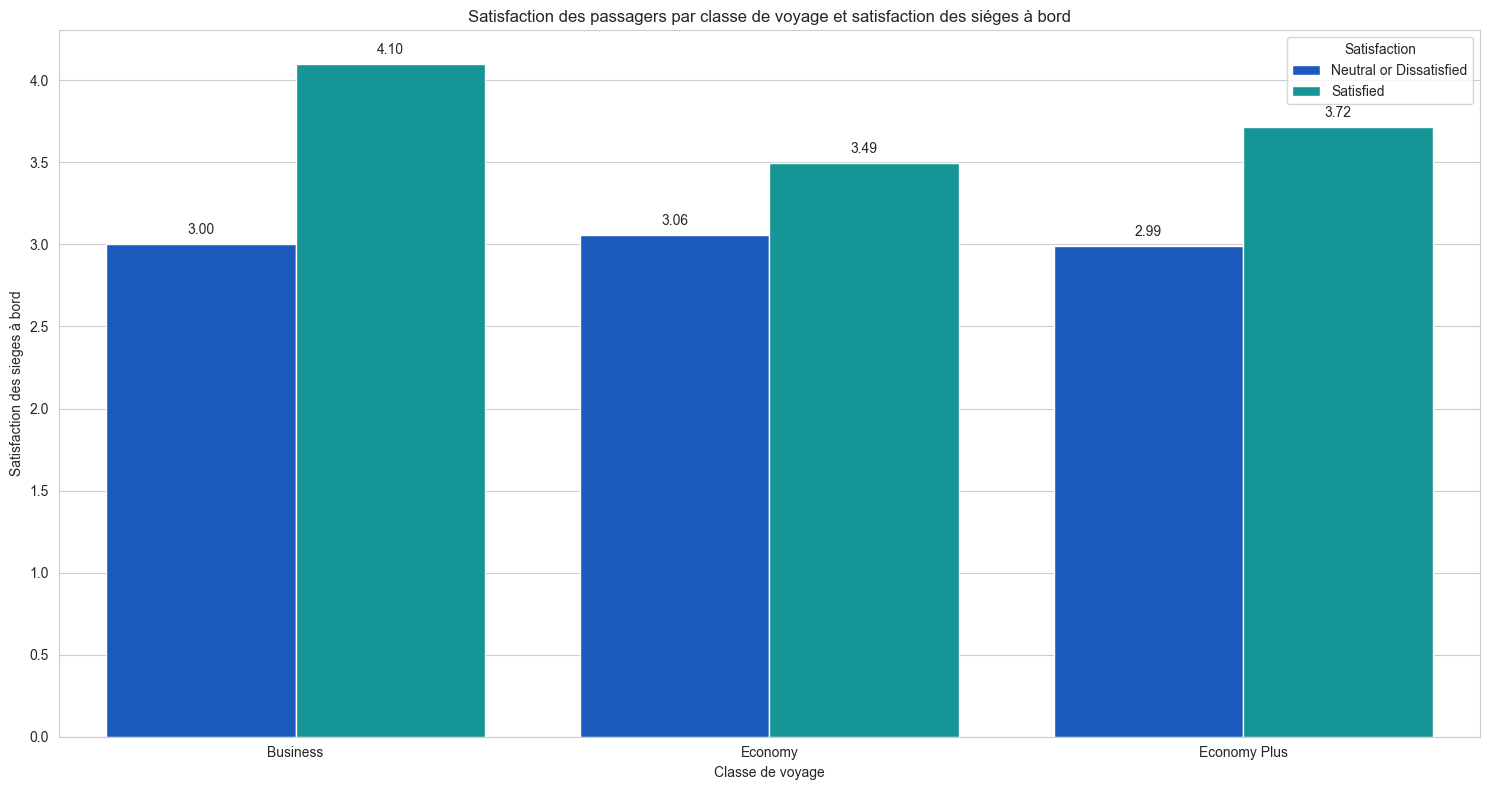

In [50]:
# Tracer la relation entre la satisfaction globale, la classe de voyage et le confort des sieges à bord

df_seat = df[df['Seat Comfort'] != 0]

plt.figure(figsize = (15, 8))
barplot3 = sns.barplot(x = 'Class', y = 'Seat Comfort', hue = 'Satisfaction', data = df_seat, palette = 'winter', errorbar = None)
plt.title('Satisfaction des passagers par classe de voyage et satisfaction des siéges à bord')
plt.xlabel('Classe de voyage')
plt.ylabel('Satisfaction des sieges à bord')
plt.legend(title = 'Satisfaction')
plt.tight_layout()

for p in barplot3.patches:
    barplot3.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')

plt.show()

Observation : Le diagramme à barres montre la relation entre la satisfaction des passagers, la classe de voyage et la satisfaction des siéges à bord. Nous pouvons observer que :

De maniere generale, peu importe la classe de voyage, les voyageurs qui ont tendance a etre satisfait des siéges à bord, le sont aussi au globale.

Quelle variable a la plus grande corrélation avec la note de satisfaction globale ?

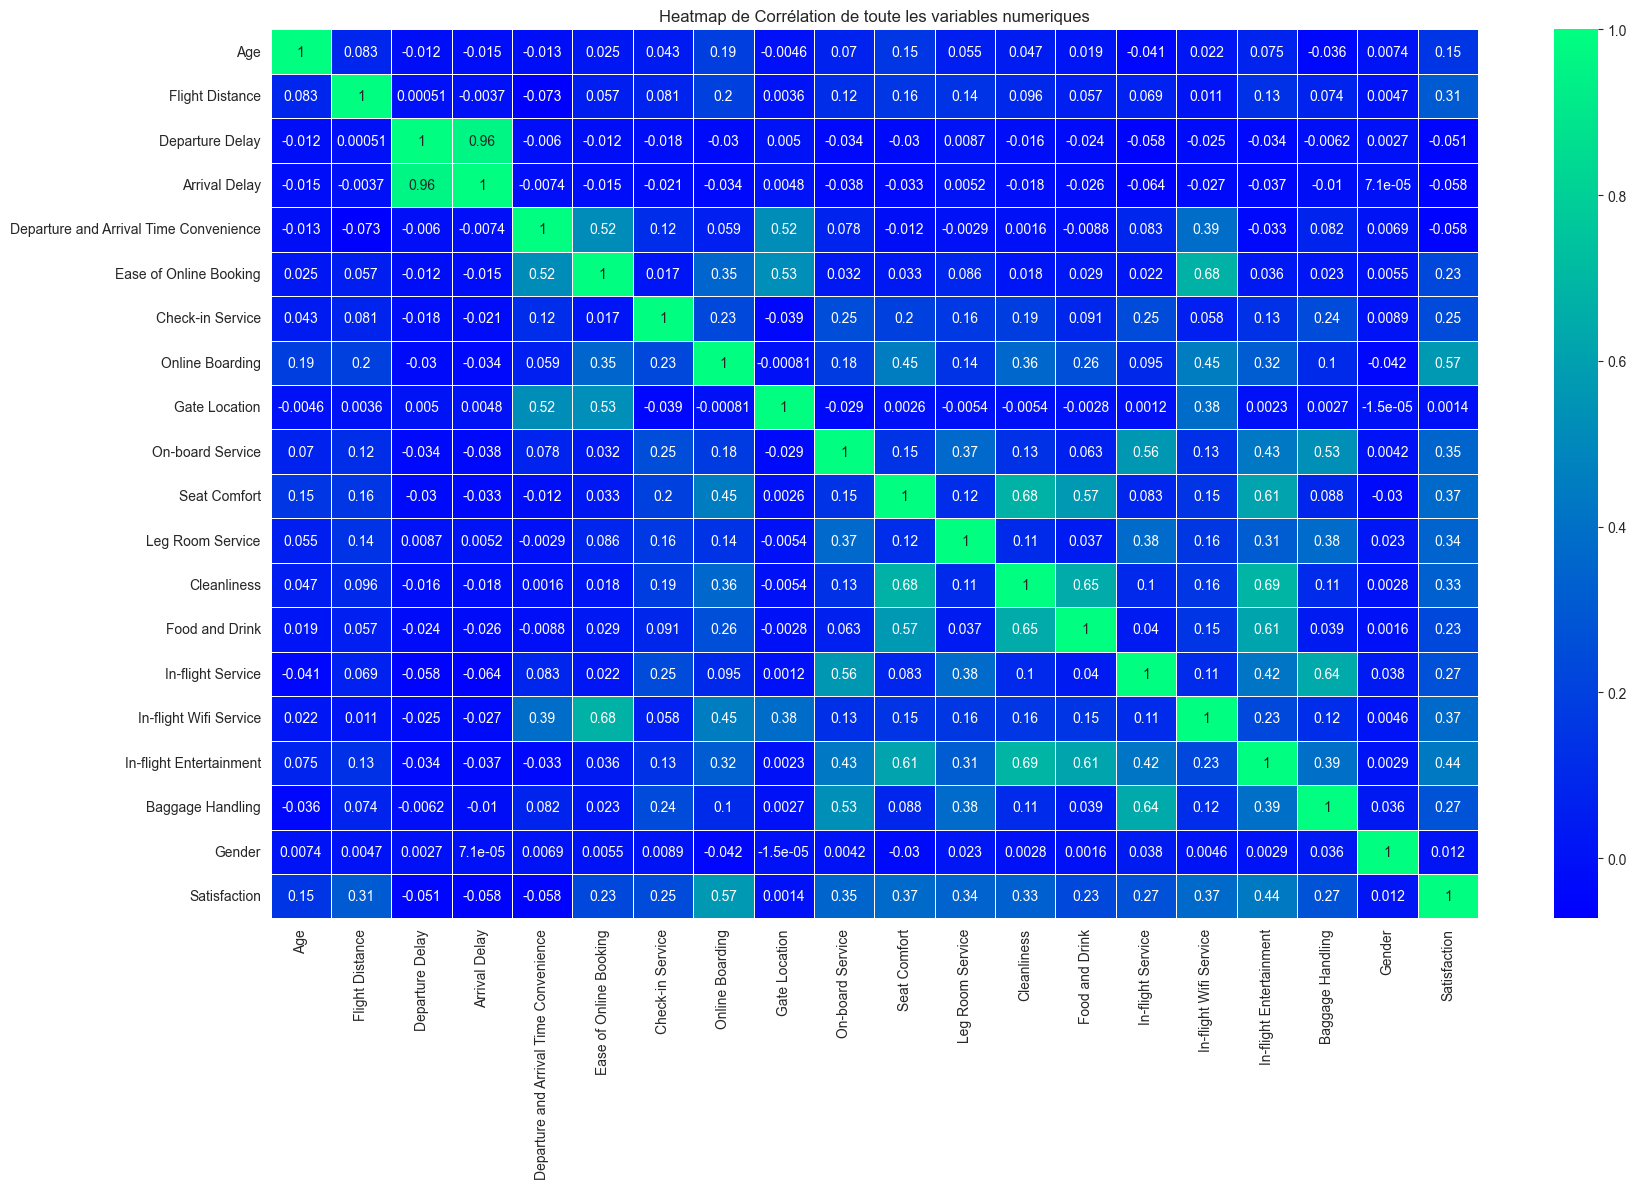

In [51]:
# Supprimer le 0 dans chaque colonne de notation car ce n'est pas une note a part entiere mais une indication qui montre que la note ne peut pas etre appliqué sur ce vol en particulier

df_zero = df[~df[['Departure and Arrival Time Convenience','Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service',
                  'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Wifi Service',
                  'Baggage Handling']].isin([0]).any(axis=1)]

# Remplacer les valeurs des variables categorielles.

satisfaction_num = df_zero['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0})
gender_num = df_zero['Gender'].map({'Male': 1, 'Female': 0})

# Creation d'un nouveau DataFrame avec toutes les variables numeriques + Satisfaction

df_num = df_zero[['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
                                                'Departure and Arrival Time Convenience', 'Ease of Online Booking',
                                                'Check-in Service', 'Online Boarding', 'Gate Location',
                                                'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
                                                'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
                                                'In-flight Entertainment', 'Baggage Handling']].copy()
df_num['Gender'] = gender_num
df_num['Satisfaction'] = satisfaction_num

# Calcul de la matrice de corrélation

correlation = df_num.corr()

# Tracer la heatmap de la corrélation

plt.figure(figsize=(18, 12))
sns.heatmap(correlation, annot=True, cmap='winter', linewidths=.5)
plt.title('Heatmap de Corrélation de toute les variables numeriques')
plt.tight_layout()
plt.show()

Observation : Les variables ayant une corrélation positive notable avec la satisfaction globale incluent "Online Boarding" (0.5), "In-flight Entertainment" (0.4), "Seat Comfort" (0.35), "On-board Service" (0.32) et "In-flight Wifi Service" (0.28).
La "Cleanliness" et "Leg Room Service" ont également une corrélation positive avec la satisfaction.
Les retards au départ et à l'arrivée, ainsi que la "Gate Location", ont une corrélation faible avec la satisfaction, indiquant un impact moindre voire nul.

### 7. Machine Learning

Étape 1 : Préparation des données


Sélection des caractéristiques (Features) : Nous allons inclure la plupart des variables disponibles, à l'exception de celles qui sont redondantes ou qui n'apportent pas d'informations utiles pour la prédiction.

Transformation des variables catégorielles : Nous allons transformer les variables catégorielles en utilisant l'encodage One-Hot pour les rendre utilisables par le modèle.

Séparation des données : Nous allons diviser les données en ensembles d'entraînement et de test afin de pouvoir évaluer la performance du modèle sur des données non vues.

In [52]:
# Variable à exclure

variable_exclus = ['ID']

# Selection des variables et de la target
X = df_zero.drop(columns = variable_exclus + ['Satisfaction'])
y = df_zero['Satisfaction']

# One-hot encoding pour les variables catégorielles

X_encoded = pd.get_dummies(X, drop_first=True)

# Separation du dataset en 2 parties train et test (80/20)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)



Étape 2 : Construction du modèle

Pour la construction du modèle, nous allons utiliser un algorithme de forêt aléatoire (Random Forest). Il est souvent utilisé pour les tâches de classification et fournit également des informations sur l'importance des caractéristiques.

In [53]:
# Création d'un Random Forest Classifier

random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Entrainement du modele sur les données d'entrainement

random_forest_model.fit(X_train, y_train)

# Prediction de la satisfaction sur les données de test

y_pred = random_forest_model.predict(X_test)

# Calcul de la precision du modéle

accuracy_rf = accuracy_score(y_test, y_pred)

print("Précision du modèle de forêt aléatoire :", accuracy_rf)



Précision du modèle de forêt aléatoire : 0.9623233252488083


In [54]:
# Mise a l'échelle des données d'entrainements et de tests

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création d'un modéle de régression logistique

logistic_model = LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1)

# Entrainement du modele sur les données d'entrainement

logistic_model.fit(X_train_scaled, y_train)

# Prediction de la satisfaction sur les données de test

y_pred_logistic = logistic_model.predict(X_test_scaled)

# Calcul de la precision du modéle

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print("Précision du modèle de régression logistique :", accuracy_logistic)




Précision du modèle de régression logistique : 0.8974241030358786


Observation : La précision globale du modèle de régression logistique est de 89,74%, ce qui est légèrement inférieur à celle du modèle de forêt aléatoire (96,23%). Cela montre que, bien que la régression logistique soit performante, la forêt aléatoire est plus adaptée à ces données spécifiques.

En résumé, bien que la régression logistique fournisse de bons résultats, la forêt aléatoire semble être un choix de modèle plus approprié pour cette tâche, comme nous l'avons observé précédemment.

Étape 3 : Importance des caractéristiques (Feature Importance)

Dans cette étape, nous allons analyser l'importance des différentes caractéristiques dans la prédiction de la satisfaction. Cela nous aidera à comprendre quels facteurs ont le plus grand impact sur la satisfaction des clients.

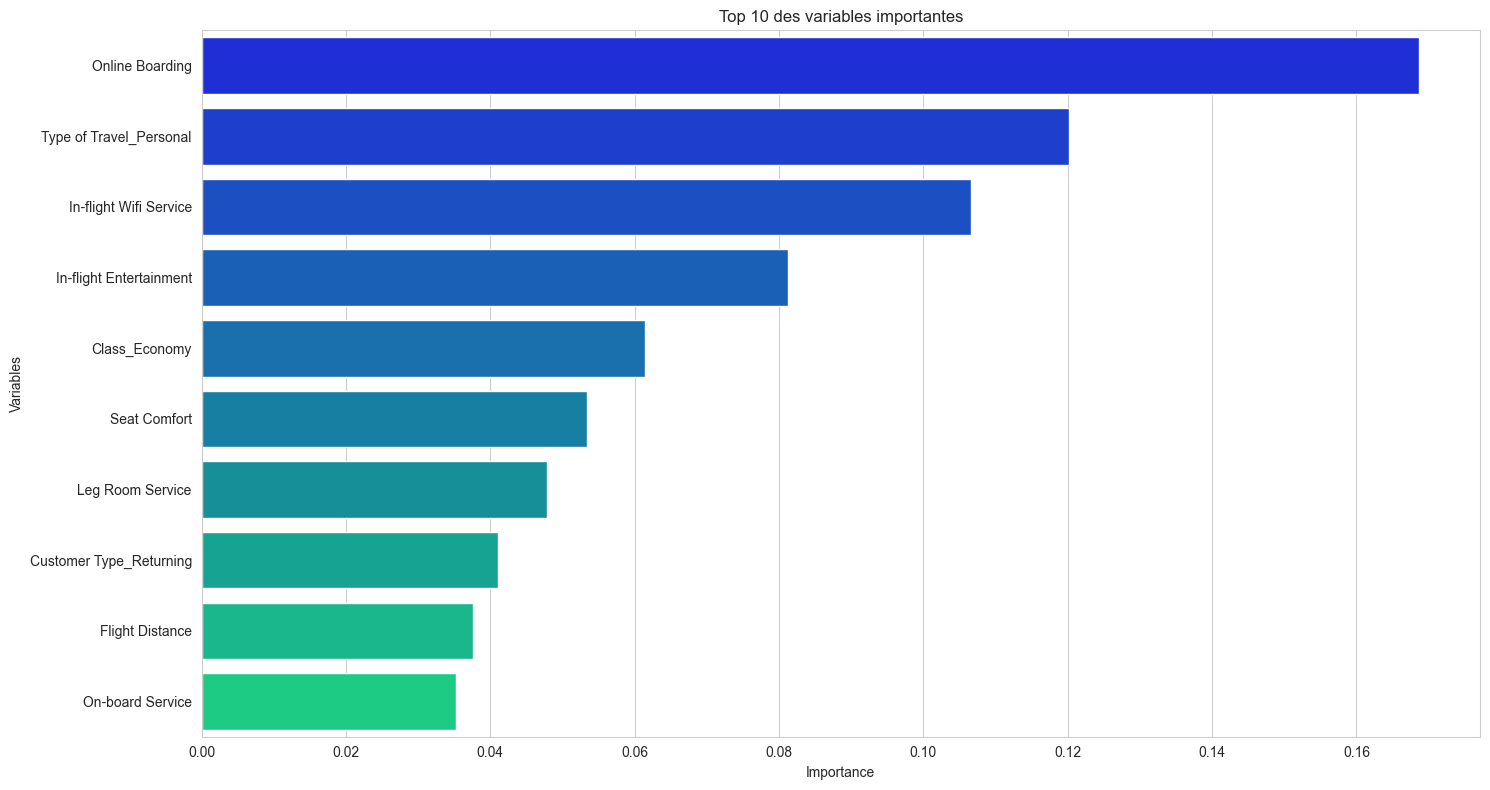

In [55]:
# Recupération des features importances à partir du modéle de forêt aléatoire entrainé

feature_importances = random_forest_model.feature_importances_

# Création d'un DataFrame regroupant les noms des variables et leur degré d'importance

feature_importances_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# On garde les 10 features les plus impactantes par ordre décroissant

feature_importances_desc = feature_importances_df.sort_values(by='Importance', ascending=False).head(10)

# Tracer les 10 features les plus impactantes

plt.figure(figsize = (15, 8))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importances_desc, palette = 'winter')
plt.title('Top 10 des variables importantes')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


### 8. Dashboard (Plotly Dash)

In [56]:
# Définition des couleurs de satisfaction

couleurs = {
    "Neutral or Dissatisfied": "red",
    "Satisfied": "blue"
}

# Histogramme de la distribution des âges

hist_age = px.histogram(df, x = 'Age', title = 'Distribution des âges des passagers')

# Graphique à barres pour la Classe vs Satisfaction

class_satisfaction_data = df.groupby(['Class', 'Satisfaction']).size().reset_index(name='Count')
fig1 = go.Figure()
for sat, color in couleurs.items():
    subset = class_satisfaction_data[class_satisfaction_data['Satisfaction'] == sat]
    fig1.add_trace(go.Bar(x=subset['Class'], y=subset['Count'], name=sat, marker_color=color))
fig1.update_layout(title='Classe vs Satisfaction')

# Graphique à barres pour le Type de Voyage vs Satisfaction

travel_satisfaction_data = df.groupby(['Type of Travel', 'Satisfaction']).size().reset_index(name='Count')
fig2 = go.Figure()
for sat, color in couleurs.items():
    subset = travel_satisfaction_data[travel_satisfaction_data['Satisfaction'] == sat]
    fig2.add_trace(go.Bar(x=subset['Type of Travel'], y=subset['Count'], name=sat, marker_color=color))
fig2.update_layout(title='Type de Voyage vs Satisfaction')

# Initialisation de l'application Dash

app = dash.Dash(__name__)

# Définir la disposition (layout) du tableau de bord

app.layout = html.Div([
    dcc.Graph(id='age_histogram', figure=hist_age),
    dcc.Graph(id='class_satisfaction', figure=fig1),
    dcc.Graph(id='travel_satisfaction', figure=fig2)
])

# Exécuter l'application

if __name__ == '__main__':
    app.run_server(debug=True)



### 9. Insights et Recommandations

**Principales découvertes:**

La satisfaction des passagers de Maven Airlines varie significativement selon la classe de voyage, le type de voyage, et les services à bord comme le Wi-Fi et la restauration. Les passagers en classe affaires sont généralement plus satisfaits. Des corrélations notables existent entre la satisfaction globale et l'embarquement en ligne, le divertissement à bord, et le confort des sièges. Des efforts ciblés pour améliorer ces domaines clés, en particulier en classe économique, peuvent contribuer à augmenter la satisfaction des passagers.


**Recommandations:** En se basant sur les résultats de notre analyse, nous pouvons formuler les recommandations suivantes :

**Améliorer les Services Clés** : Mettre l'accent sur l'amélioration des services à forte corrélation avec la satisfaction, tels que l'embarquement en ligne, le divertissement à bord, et le confort des sièges.

**Cibler les Besoins des Passagers en Classe Économique** : Offrir des améliorations spécifiques pour la classe économique, où l'insatisfaction est plus élevée.

**Optimiser le Service Wi-Fi et de Restauration** : Évaluer et améliorer ces services, car ils ont un impact direct sur la satisfaction globale.

**Personnaliser les Offres selon le Type de Voyage** : Différencier les offres et les services entre les voyageurs d'affaires et les voyageurs personnels pour mieux répondre à leurs besoins spécifiques.

**Surveiller Continuellement les Retours des Passagers** : Établir un système de suivi régulier des retours des passagers pour identifier rapidement les domaines d'amélioration.

### 10. Conclusion

L'analyse de la satisfaction des passagers de Maven Airlines a révélé des domaines clés d'opportunité et d'amélioration. La classe de voyage, le type de voyage, et des services spécifiques comme le Wi-Fi et la restauration jouent un rôle vital dans la satisfaction globale. Les insights obtenus permettent de cibler efficacement les améliorations, avec un accent particulier sur la classe économique. Dans un futur proche, des analyses supplémentaires pourraient être menées, comme l'exploration de segments de passagers spécifiques ou l'étude de l'impact des retards sur la satisfaction. La mise en œuvre de recommandations et l'utilisation d'un modèle de machine learning soutiennent l'objectif de Maven Airlines de se remettre rapidement sur la voie du succès, tout en ouvrant la voie à des enquêtes plus approfondies.